In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import PCA

In [ ]:
# Project Proposal:
# A brief proposal outlining your project’s objectives, dataset selection, and the tools or libraries you plan to use (e.g., Python, scikit-learn).


# Project Report:
# A comprehensive project report detailing the steps taken, results obtained, and your analysis.
# Include visualizations, comparisons, and insights gained from the dimensionality reduction techniques.

# Preprocess

In [2]:
file_name = '/Users/wan/Desktop/Assignment/dsan-5000-project-962570185-main/data/others/IMDB_Top_250_Movies.csv'
df=pd.read_csv(file_name)  
print(df)

#CONVERT FROM STRING LABELS TO INTEGERS 
labels=[]; #y1=[]; y2=[]
sentiment=[]
for label in df["sentiment"]:
    if label not in labels:
        labels.append(label)
        print("index =",len(labels)-1,": label =",label)
    for i in range(0,len(labels)):
        if(label==labels[i]):
            sentiment.append(i)
sentiment=np.array(sentiment)
 
corpus=df["review"].to_list()
print("number of text chunks = ",len(corpus))
print(corpus[0:3])

     rank                      name  year  rating                       genre  \
0       1  The Shawshank Redemption  1994     9.3                       Drama   
1       2             The Godfather  1972     9.2                 Crime,Drama   
2       3           The Dark Knight  2008     9.0          Action,Crime,Drama   
3       4     The Godfather Part II  1974     9.0                 Crime,Drama   
4       5              12 Angry Men  1957     9.0                 Crime,Drama   
..    ...                       ...   ...     ...                         ...   
245   246                  The Help  2011     8.1                       Drama   
246   247               Dersu Uzala  1975     8.2   Adventure,Biography,Drama   
247   248                   Aladdin  1992     8.0  Animation,Adventure,Comedy   
248   249                    Gandhi  1982     8.0     Biography,Drama,History   
249   250        Dances with Wolves  1990     8.0     Adventure,Drama,Western   

    certificate run_time   

# Vectorize

In [3]:
vectorizer=CountVectorizer(min_df=0.001)   
Xs  =  vectorizer.fit_transform(corpus)   
X=np.array(Xs.todense())
maxs=np.max(X,axis=0)
X=np.ceil(X/maxs)
print(X)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


# PCA

In [9]:
# apply PCA and determine n_components
pca_original = PCA()
pca_original.fit(X)
cumulative_variance = np.cumsum(pca_original.explained_variance_ratio_)
n_components = np.argmax(cumulative_variance >= 0.8) + 1


[3.74202716e-02 8.00444023e-03 4.32688964e-03 ... 7.60450540e-05
 7.59578368e-05 7.58843782e-05]
[433.06668497 200.29347021 147.26149913 ...  19.52256126  19.51136269
  19.50192572]


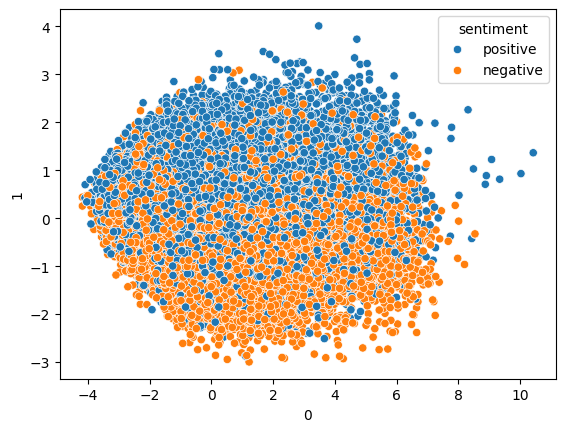

In [10]:
# visualize the reduced dimensional data
pca = PCA(n_components=n_components)
pca.fit(X)
print(pca.explained_variance_ratio_)
print(pca.singular_values_)

principal_components = pca.fit_transform(X)
df2 = pd.DataFrame(data = principal_components)
df3=pd.concat([df2,df['sentiment']], axis=1)

sns.scatterplot(data=df2, x=0, y=1,hue=df["sentiment"]) 
plt.show()

sns.pairplot(data=df3,hue="sentiment") 
plt.show()

# t-SNE

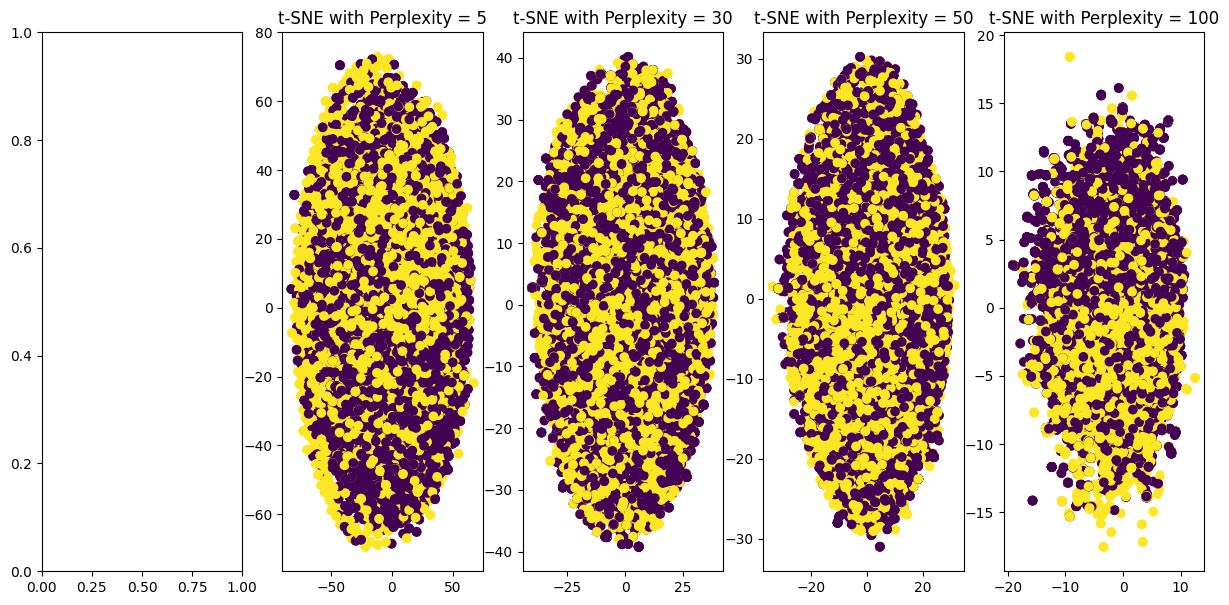

In [8]:

from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_standardized = scaler.fit_transform(X)

perplexities = [5, 30, 50, 100] 
tsne_results = []

for perplexity in perplexities:
    tsne = TSNE(n_components=2, perplexity=perplexity, random_state=0)
    tsne_result = tsne.fit_transform(data_standardized)
    tsne_results.append(tsne_result)

 
fig, axes = plt.subplots(1, len(perplexities) + 1, figsize=(15, 7))
for i, tsne_result in enumerate(tsne_results):
    axes[i + 1].scatter(tsne_result[:, 0], tsne_result[:, 1], c=sentiment)
    axes[i + 1].set_title(f't-SNE with Perplexity = {perplexities[i]}')
plt.show()

# Evaluation and Comparison

### 
Compare the visualization, PCA is more intuitive in this case



In terms of the trade-offs and scenarios where one technique may outperform the other, here's the summary:

PCA is a linear algorithm. The principal components are the linear combination of the input variables, thus it is more interpretable. Moreover, it is effective when you need preserve the global structure of the data. Therefore, when reducing the dimension of data, the dimensions with low variance will often be discarded, and potentially losing important information of data. 

t-SNE is a non-linear algorithm. Thus it can visualize complex data better than PCA. It is effective when you need preserve the local structure of the data. Therefore, it may not preserve the glocal feature of the data. However, t-SNE costs more computational resources, especially for large datasets.




